<a href="https://colab.research.google.com/github/PatrickBassan/N3_data-science/blob/main/N3_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N3 - Ciência de Dados
#### Aluno: Patrick de Freitas Bassan

### Dataset utilizado
Optido através de uma solicitação a Prefeitura de Joinville, o dataset contém os dados meteorológicos de Joinville, desde 01/01/2011 até 31/12/2021.

Nele as medições são feitas a cada hora do dia, devido a horários nos quais as medições não foram feitas, temos ao todo 52743 dados.

### Materiais e métodos

Nesse trabalho tenho o objetivo de prever a precipitação de chuva em Joinville, utilizando dados de temperatura e umidade.

O  universo  de  estudo  é  composto  pelos dados dos meteorológicos que serão as seguintes features:

* Temp: Temperatura média em graus Celsius;
* Umi: Umidade relativa do Ar, dada em porcentagem;
* Prec: Precipitação de Chuva em mm, esse será nosso Y;



# Análise descritiva dos dados
Primeiramente é necessário entender os dados que obtivemos, para isso importei as bibliotecas que serão usadas, o dataset e imprimi os primeiros valores dele.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import seaborn as sns

In [60]:
dataset = pd.read_excel("dataset.xlsx")
display(dataset)

,data,hora,temp,umid,prec
0,2011-03-14,21:00:00,22.28,81.60,0.0
1,2011-03-14,22:00:00,21.88,78.00,0.0
2,2011-03-14,23:00:00,21.58,78.77,0.0
3,2011-03-15,00:00:00,21.43,74.11,0.0
4,2011-03-15,01:00:00,21.09,78.59,0.0
...,...,...,...,...,...
52739,2021-12-31,10:00:00,23.78,92.00,0.0
52740,2021-12-31,12:00:00,27.39,80.70,0.0
52741,2021-12-31,13:00:00,28.48,70.83,0.0
52742,2021-12-31,14:00:00,29.31,68.18,0.0


In [54]:
dataset.isnull().sum()

data    0
hora    0
temp    0
umid    0
prec    0
dtype: int64

Como podemos ver acima, o  conjunto  de  dados  analisados  consiste  de  informações  de com 3 variáveis e 52743 observações. Não há valores faltantes no quadro de dados já que o tratamento foi feito externamente via Excel.

In [61]:
# obtendo algunas informações a respeito do datset
dataset.describe()

,temp,umid,prec
count,52744.000000,52744.000000,52744.000000
mean,21.408882,85.885299,0.157693
std,5.330468,14.092992,1.145043
min,-100.000000,-100.000000,0.000000
25%,18.240000,78.510000,0.000000
50%,21.230000,91.000000,0.000000
75%,24.410000,96.200000,0.000000
max,42.420000,100.000000,76.990000


Como podemos ver na tabela acima, nota-se que a temperatura e umidade mínima é -100, um valor que parece muito errado considerando a cidade analisada. A temperatura máxima é de 42 graus o que parece plausível, enquanto a umidade apresenta uma máxima de 100%, valor também condizente com a realidade. Podemos ver que os valores médio (mean) e mediano (50%) da temperatura são quase os mesmos, enquanto os da umidade possuem uma diferença significativa.

Enquanto na precipitação, temos um valor máximo de 77mm e um mínimo de 0, que representa horas sem chuva.

# Visualizando os dados
Agora iremos analisar nossas variáveis.

<ipython-input-55-7e4b057760a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.temp,color='r')


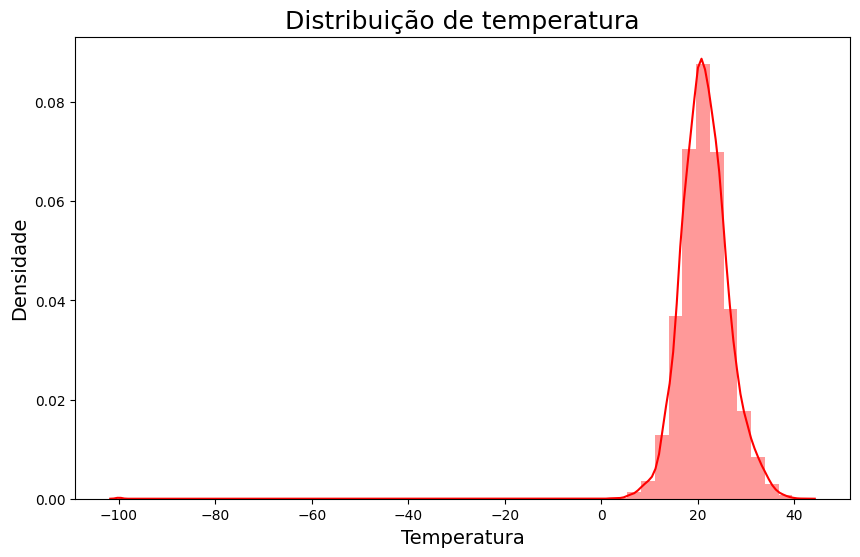

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(dataset.temp,color='r')
plt.title('Distribuição de temperatura',size=18)
plt.xlabel('Temperatura',size=14)
plt.ylabel('Densidade',size=14)
plt.show()

<ipython-input-56-e977fbd608c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.umid,color='g')


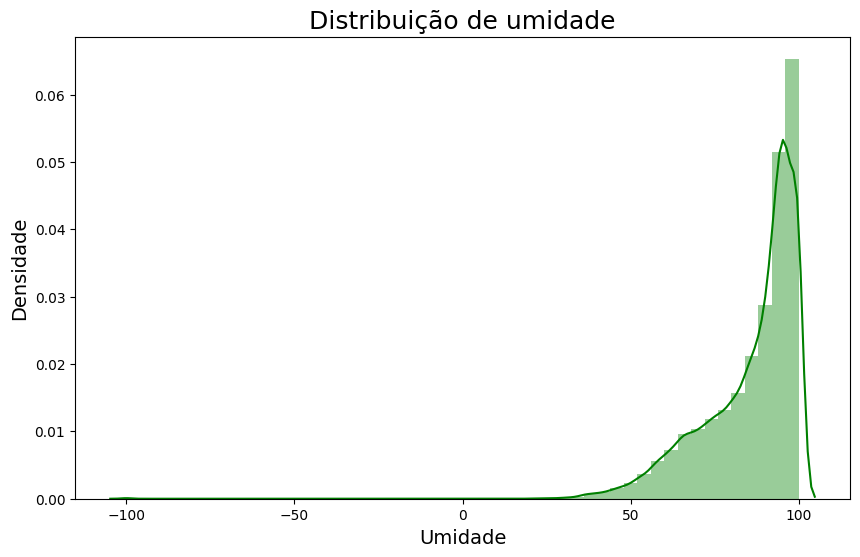

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(dataset.umid,color='g')
plt.title('Distribuição de umidade',size=18)
plt.xlabel('Umidade',size=14)
plt.ylabel('Densidade',size=14)
plt.show()

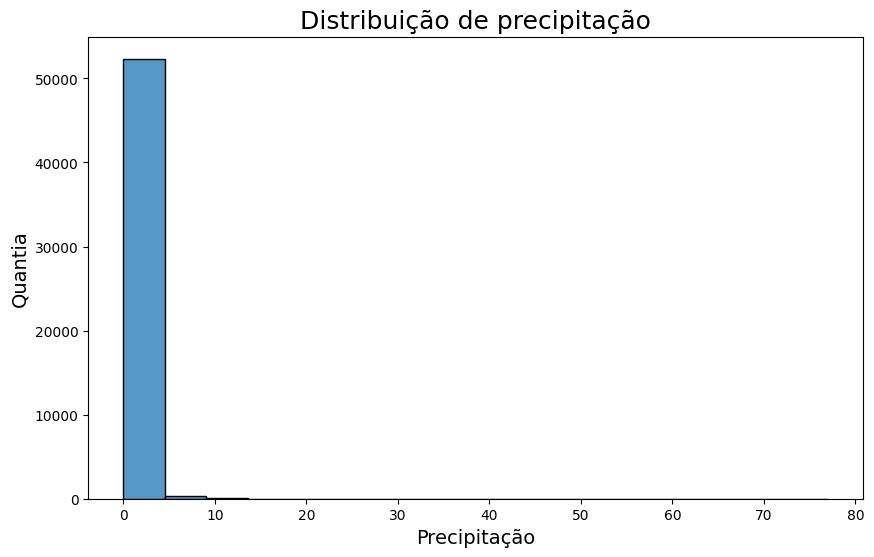

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(dataset.prec)
plt.title('Distribuição de precipitação',size=18)
plt.xlabel('Precipitação',size=14)
plt.ylabel('Quantia',size=14)
plt.show()

<ipython-input-58-e0a0532b9815>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.prec,color='g')


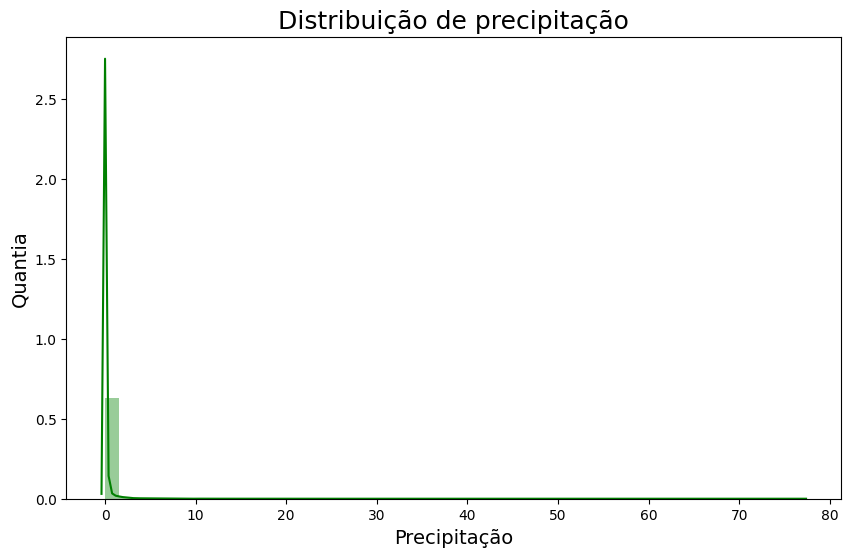

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(dataset.prec,color='g')
plt.title('Distribuição de precipitação',size=18)
plt.xlabel('Precipitação',size=14)
plt.ylabel('Quantia',size=14)
plt.show()

<ipython-input-59-b30ab074c3a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,square=True,


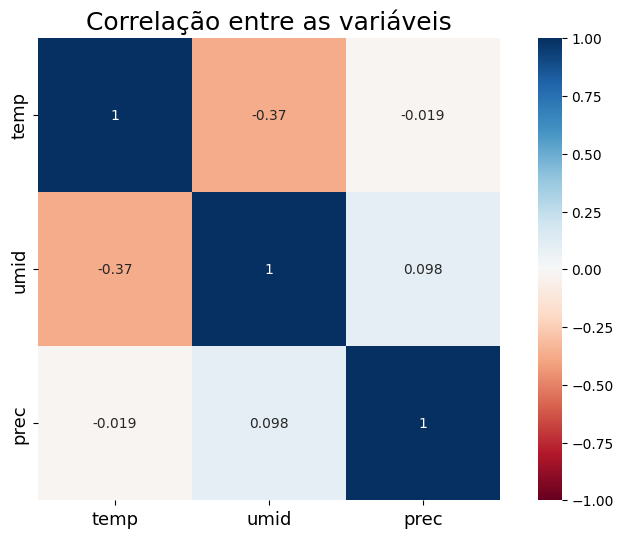

In [59]:
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlação entre as variáveis',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

# Criando o Modelo

Com a análise realizada, agora iremos montar nosso modelo de regressão.

In [63]:
x = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, 4].values

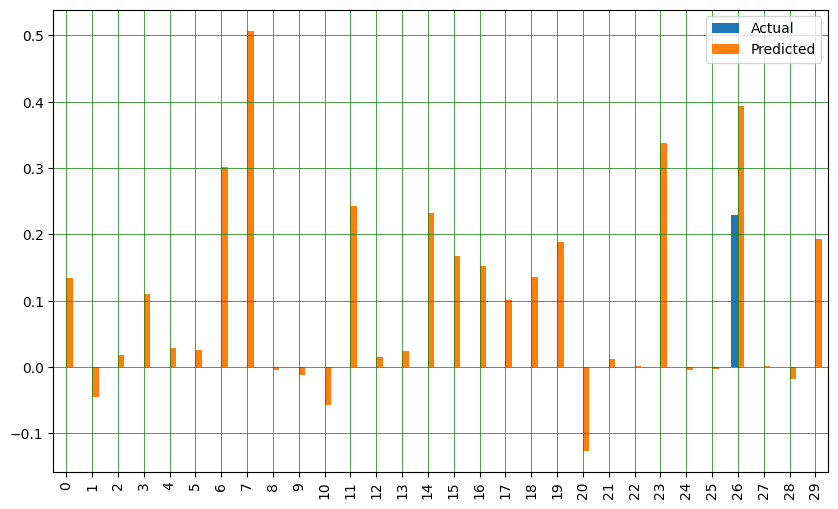

Mean Absolute Error: 0.2955638460356523
Mean Squared Error: 1.2581089803565155
Root Mean Squared Error: 1.1216545726543958


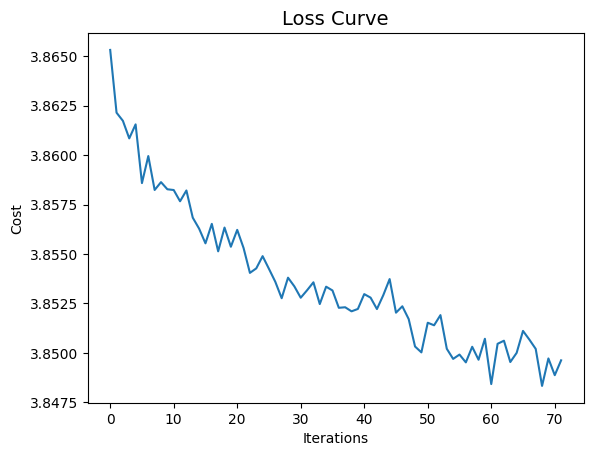

In [28]:
# MLP Regressor
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

#Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter = 1000,activation = 'relu', solver = 'adam')
mlp_reg.fit(trainX_scaled, trainY)

#Avaliando o modelo
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Deploy com Joblib

In [67]:
import joblib

artifact_joblib_filename = 'mlp_reg.joblib'

local_path = artifact_joblib_filename
joblib.dump(mlp_reg, local_path)

# Carrega os modelos e avalia a consistência deles em ambas bilbiotecas.
loaded_joblib_model = joblib.load(artifact_joblib_filename)
joblib_results = loaded_joblib_model.score(testX, testY)
print('Joblib: ', joblib_results)

Joblib:  -324303.7329205184


Utilizando o modelo

In [68]:
loaded_joblib_model.predict(testX[0:5])

array([667.41335402, 572.53640374, 742.53396005, 679.01476791,
       565.11434412])